In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('heights_weights_genders.csv')

In [3]:
X = df.drop('Gender',axis = 1)
y = df.Gender

In [4]:
y_encoded = y.map({'Male':0, 'Female':1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state= 123)

In [17]:
model = LogisticRegression(lr = 0.01, n_iters = 1000)

In [18]:
model.fit(X_train, y_train)

In [21]:
preds = model.predict(X_test)

In [63]:
pred_soft = model.predict(X_test, prob = True)

In [22]:
confusion_matrix(preds, y_test)

array([[911,  88],
       [ 83, 918]])

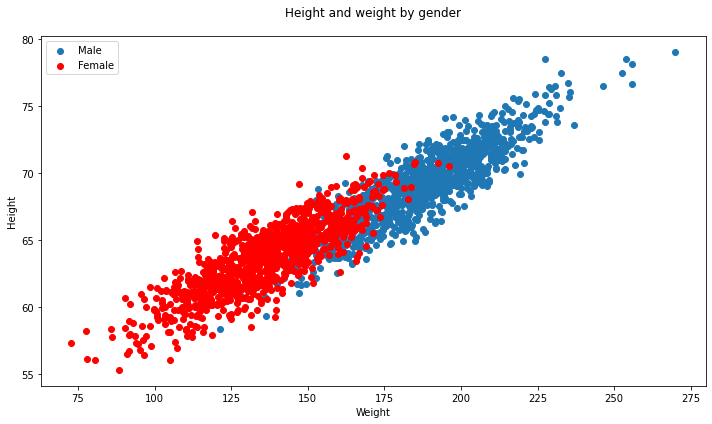

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X_test.Weight[y_test[y_test == 0].index], X_test.Height[y_test[y_test == 0].index], label = 'Male')
ax.scatter(X_test.Weight[y_test[y_test == 1].index], X_test.Height[y_test[y_test == 1].index], label = 'Female', color = 'r')
ax.set_title('Height and weight by gender', pad= 20)
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [60]:
roc_auc_score(preds, y_test)

0.9144974144974145

In [83]:
tpr_hard, fpr_hard, _ = roc_curve(y_test, preds)
tpr_soft, fpr_soft, _ = roc_curve(y_test, pred_soft)

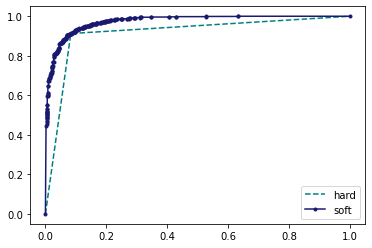

In [87]:
plt.plot(tpr_hard, fpr_hard, linestyle = '--', color = 'teal', label = 'hard')
plt.plot(tpr_soft, fpr_soft, marker = '.', color = 'midnightblue', label = 'soft')
plt.legend(loc = 'best')
plt.show()